# Suicide Analysis
    Berdasarkan data yang disediakan oleh situs ourworldindata.org, The World Health Organization (WHO) dan The Global Burden of Disease mengestimasi bahwa sejumlah 800,000 orang meninggal karena bunuh diri setia tahunnya, yang berarti setidaknya ada satu orang yang meninggal bunuh diri setiap 40 detik. Oleh karena itu, akan dilakukan analisis mendalam terhadap kasus bunuh diri berdasarkan data yang diperoleh

## Deskripsi Kolom
    - Country: Negara asal seseorang yang bunuh diri
    - Year: Tahun kejadian bunuh diri
    - Sex: Jenis kelamin
    - age: range umur orang yang bunuh diri
    - Suicides_no: Jumlah orang yang bunuh diri
    - Population: Populasi
    - Suicides/100k pop: Suicide to population rate
    - country-year: Negara dan tahun kejadian
    - HDIforyear: Human development index
    - gdp_for_year:gdp negara
    - gdp_per_capita: gdp per kapita
    - Generation: klasifikasi generasi

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as ss
import pycountry

%matplotlib inline
sns.set(style='darkgrid') #To make the plot's axis shown

In [13]:
# import the data and look at the first five rows
df = pd.read_csv('suicide.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [24]:
# looking at the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   sex             27820 non-null  object 
 3   age             27820 non-null  object 
 4   suicides_no     27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   rates           27820 non-null  float64
 7   country-year    27820 non-null  object 
 8   HDI_for_year    8364 non-null   float64
 9   gdp_for_year    27820 non-null  int64  
 10  gdp_per_capita  27820 non-null  int64  
 11  generation      27820 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.5+ MB


In [26]:
# looking at the data description
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,27820,101,Iceland,382,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,27820.0,NaN,NaN,NaN,2001.258375,8.469055,1985.0,1995.0,2002.0,2008.0,2016.0
sex,27820,2,male,13910,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,27820,6,75+ years,4642,NaN,NaN,NaN,NaN,NaN,NaN,NaN
suicides_no,27820.0,NaN,NaN,NaN,242.574407,902.047917,0.0,3.0,25.0,131.0,22338.0
population,27820.0,NaN,NaN,NaN,1844793.617398,3911779.441756,278.0,97498.5,430150.0,1486143.25,43805214.0
rates,27820.0,NaN,NaN,NaN,12.816097,18.961511,0.0,0.92,5.99,16.62,224.97
country-year,27820,2321,Republic of Korea2001,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HDI_for_year,8364.0,NaN,NaN,NaN,0.776601,0.093367,0.483,0.713,0.779,0.855,0.944
gdp_for_year,27820.0,NaN,NaN,NaN,445580969025.727112,1453609985940.91626,46919625.0,8985352832.0,48114688201.0,260202429150.0,18120714000000.0


In [27]:
# we are going to rename some of the column name
df.rename(columns={"suicides/100k pop":"rates","HDI for year":"HDI_for_year",
                  " gdp_for_year ($) ":"gdp_for_year","gdp_per_capita ($)":"gdp_per_capita"
                  }, 
          inplace=True)
# Now look at the columns
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population', 'rates',
       'country-year', 'HDI_for_year', 'gdp_for_year', 'gdp_per_capita',
       'generation'],
      dtype='object')

In [22]:
# Cleaning some of the columns for our convenience
df["gdp_for_year"] = df["gdp_for_year"].str.replace(",","").astype(np.int64) #removing the commas
df["age"] = df["age"].str.replace("5-14 years","05-14 years") #replace 5 with 05

### Now let's look at the correlation between the variables

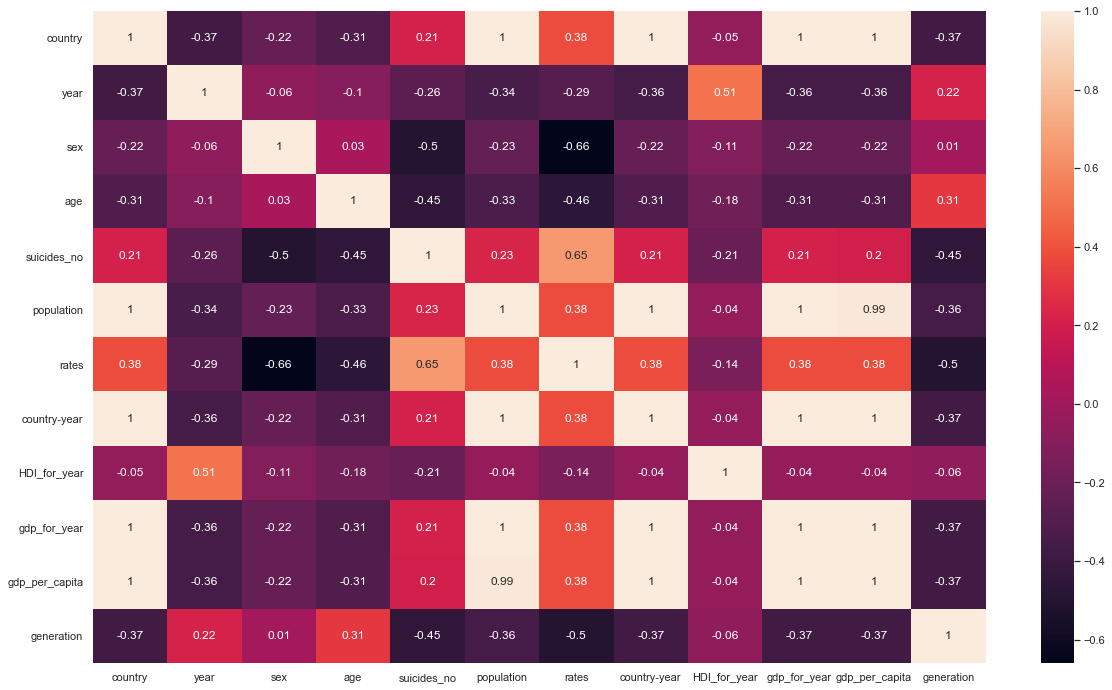

In [55]:
#Akan ditunjukan heatmap atau korelasi dari tiap variabel
plt.figure(figsize=(20,12))
corr_ = df.apply(lambda x: pd.factorize(x)[0]).corr(method='pearson')
sns.heatmap(np.round(corr_.corr(),2), annot=True)
plt.show()

In [56]:
corr_.corr()["suicides_no"].sort_values(ascending=False)

suicides_no       1.000000
rates             0.648930
population        0.227557
country           0.208087
country-year      0.207542
gdp_for_year      0.207542
gdp_per_capita    0.204418
HDI_for_year     -0.205518
year             -0.260984
generation       -0.451415
age              -0.454275
sex              -0.502000
Name: suicides_no, dtype: float64

As we can see the gender, age, and generation variables play an important role in determining the suicides number

### Suicide number over the year

In [120]:
total_suicide = pd.DataFrame(df.groupby('year')['suicides_no'].sum())
total_population = pd.DataFrame(df.groupby('year')['population'].sum())

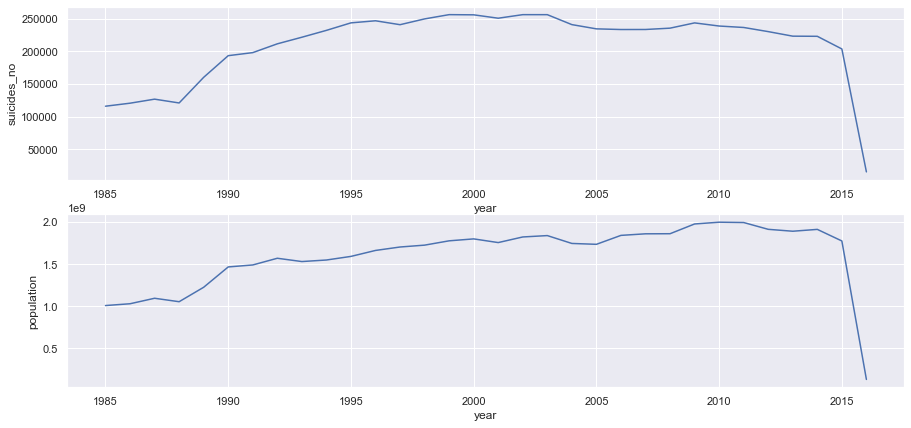

In [148]:
f, axes = plt.subplots(2, 1, figsize=(15,7))

sns.lineplot(total_suicide.index, total_suicide['suicides_no'], ci = None, ax=axes[0])
sns.lineplot(total_population.index, total_population['population'], ci = None, ax=axes[1])
plt.show()

There is a correlation between population and suicides number.

### Suicide number by gender

Text(0.5, 1.0, 'Suicides by Gender')

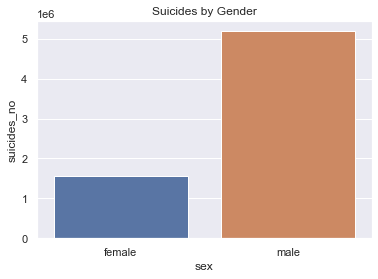

In [157]:
by_gender = pd.DataFrame(df.groupby('sex')['suicides_no'].sum())
sns.barplot(by_gender.index, by_gender['suicides_no'])

### The suicide number overtime by gender

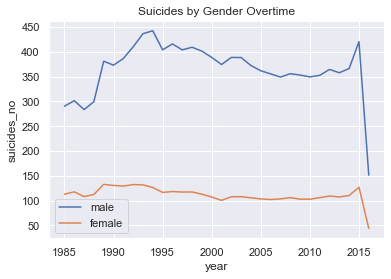

In [156]:
df_male = df[df.sex == "male"]
df_female = df[df.sex == "female"]

sns.lineplot(df_male['year'], df['suicides_no'], ci = None)
sns.lineplot(df_female['year'], df['suicides_no'], ci = None)
plt.legend(["male", 'female'])
plt.title('Suicides by Gender Overtime')
plt.show()

As we can see the number of male suicides is always a lot higher that female over time.

### Looking at the number of suicide rate overtime by age

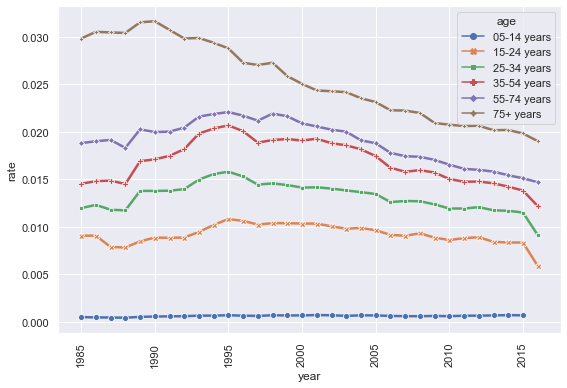

In [266]:
df_age = df.groupby(["year","age"])["suicides_no", "population"].sum()
by_age = df_age.copy().reset_index()
by_age['rate'] = by_age['suicides_no']*100/by_age['population']

plt.figure(figsize=(9,6))
sns.lineplot("year", "rate", hue = "age",
             data = by_age, linewidth = 2.5, style = "age", markers=True
            , dashes=False)
plt.xticks(rotation = 90)
plt.show()

As we can see the total number of suicides is higher when the age is higher. This shows us a high correlation between age and suicide

But we need more data to confirm about the age factor, we need to know about the suicide method because there is a method named **euthanasia** which is a "legal suicide". So the question is whether people with higher age conducting euthanasia is a suicide?

### Looking at the number of suicide rate overtime by generation

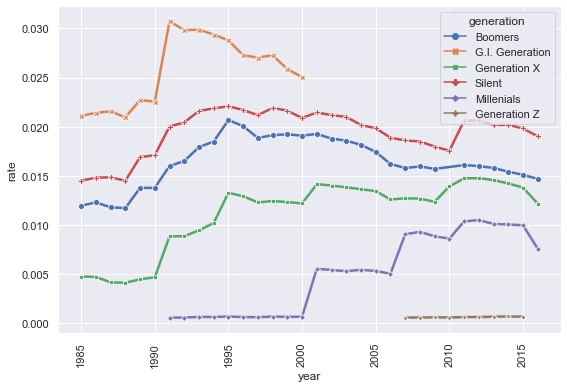

In [269]:
df_generation = df.groupby(["year","generation"])["suicides_no", "population"].sum()
by_gen = df_generation.copy().reset_index()
by_gen['rate'] = by_gen['suicides_no']*100/by_gen['population']

plt.figure(figsize=(9,6))
sns.lineplot("year", 'rate', hue = "generation",
             data = by_gen, linewidth = 2.5, style = "generation", markers=True
            , dashes=False)
plt.xticks(rotation = 90)
plt.show()

I'm gonna provide the infomations about generations:

    - G.I. Generation — born 1901-1924
    - The Silent Generation — born 1925-1945
    - Baby Boomer Generation — born 1946-1964
    - Generation X — born 1965-1980
    - Generation Y (Millenials) — born 1981-1996
    - Generation Z — born 1997-2012
As we can see the oldest generation has the highest suicide rate. But again we need to confrim about the suicide methods.

### We're going to look at gender percentage by age

In [203]:
gender_on_age = pd.DataFrame(df.groupby(['age','sex'], as_index=False)['suicides_no'].sum())
gender_on_age

,age,sex,suicides_no
0,05-14 years,female,16997
1,05-14 years,male,35267
2,15-24 years,female,175437
3,15-24 years,male,633105
4,25-34 years,female,208823
5,25-34 years,male,915089
6,35-54 years,female,506233
7,35-54 years,male,1945908
8,55-74 years,female,430036
9,55-74 years,male,1228407


In [209]:
pctg = []
for cat in gender_on_age['age'].unique():
    for i in range(len(gender_on_age)):
        if gender_on_age['age'][i] == cat:
            if gender_on_age['sex'][i] == 'female':
                pctg.append(gender_on_age['suicides_no'][i]\
                            /gender_on_age[gender_on_age['age'] == cat].groupby('age')\
                            .sum()['suicides_no'][0])
            elif gender_on_age['sex'][i] == 'male':
                pctg.append(gender_on_age['suicides_no'][i]\
                            /gender_on_age[gender_on_age['age'] == cat].groupby('age')\
                            .sum()['suicides_no'][0])

gender_on_age['percentage'] = [round(i*100,2) for i in pctg]
gender_on_age

,age,sex,suicides_no,percentage
0,05-14 years,female,16997,32.52
1,05-14 years,male,35267,67.48
2,15-24 years,female,175437,21.70
3,15-24 years,male,633105,78.30
4,25-34 years,female,208823,18.58
5,25-34 years,male,915089,81.42
6,35-54 years,female,506233,20.64
7,35-54 years,male,1945908,79.36
8,55-74 years,female,430036,25.93
9,55-74 years,male,1228407,74.07


<AxesSubplot:xlabel='percentage', ylabel='age'>

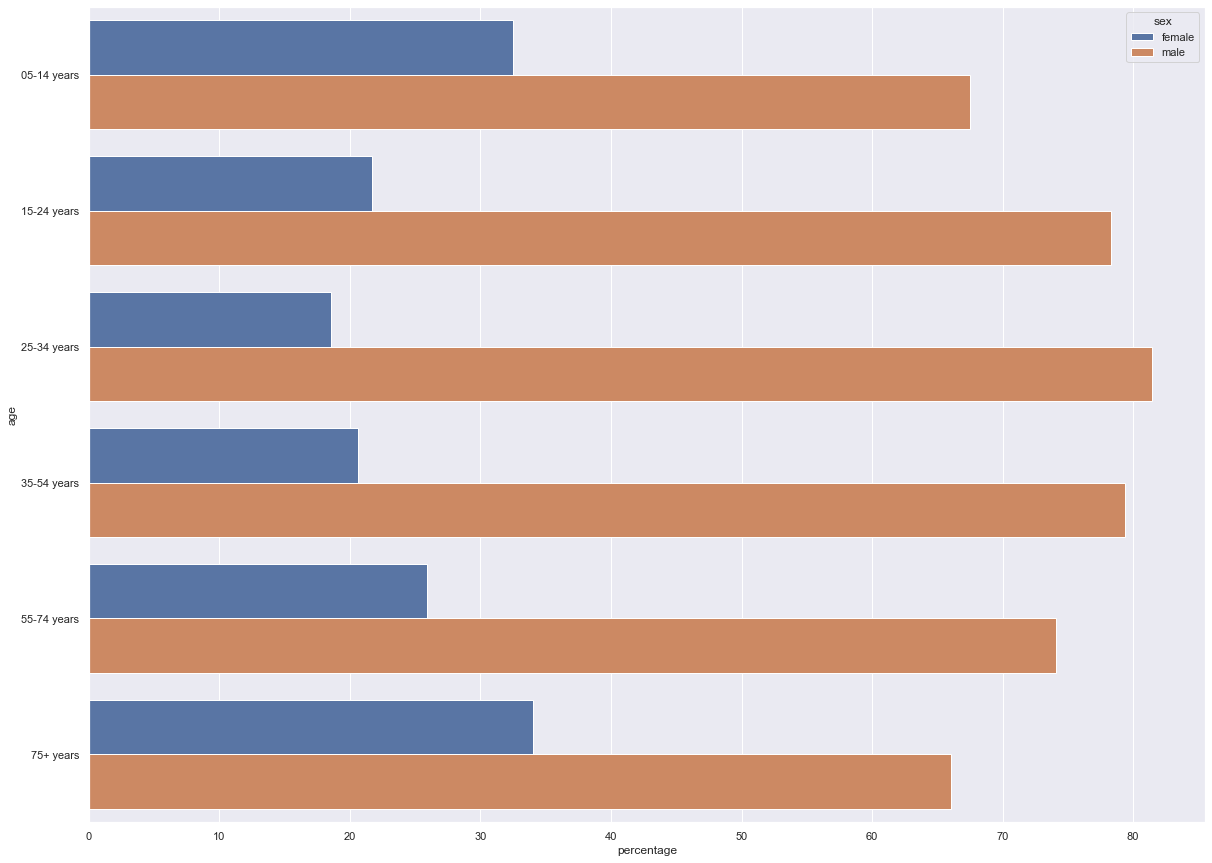

In [211]:
plt.figure(figsize=(20,15))

sns.barplot(x='percentage', y='age', data=gender_on_age, hue='sex', ci=None)

### Top 10 Suicide by Country

In [235]:
by_country = pd.DataFrame(df.groupby('country', as_index=False)['suicides_no','population'].sum())
by_country

,country,suicides_no,population
0,Albania,1970,62325467
1,Antigua and Barbuda,11,1990228
2,Argentina,82219,1035985431
3,Armenia,1905,77348173
4,Aruba,101,1259677
...,...,...,...
96,United Arab Emirates,622,36502275
97,United Kingdom,136805,1738767780
98,United States,1034013,8054027201
99,Uruguay,13138,84068943


In [250]:
prcn = []

for countries in by_country['country'].unique():
    for i in range(len(by_country['country'].unique())):
        if by_country['country'][i] == countries:
            prcn.append(by_country['suicides_no'][i]/by_country['population'][i].sum())

by_country['percentage'] = [round(i*100,5) for i in prcn]
top_10 = by_country.sort_values('percentage', ascending=False).head(10)

<AxesSubplot:xlabel='percentage', ylabel='country'>

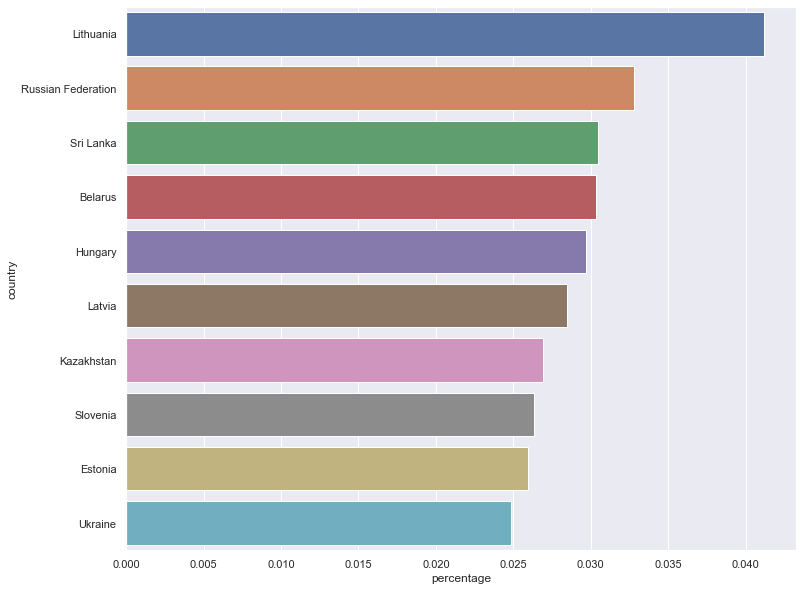

In [260]:
plt.figure(figsize=(12,10))
sns.barplot(y=top_10['country'], x=top_10['percentage'].sort_values(ascending=False))

### I'll use tableau geospatial for further visualization

The table chosen:
1. Suicide number by Gender
2. Suicide number by Age
3. Suicide number by generation
4. Suicide number by Gender and Age
5. Suicide number for each Country

In [270]:
#1
df_gender = df[['sex','year','suicides_no']]
df_gender.to_excel('by_gender.xlsx')

#2
by_age.to_excel('by_age.xlsx')

#3
by_gen.to_excel('by_gen.xlsx')

#4
gender_on_age.to_excel('gender_on_age.xlsx')

#5
by_country.to_excel('by_country.xlsx')